In [2]:
from numpy import *
from matplotlib.pyplot import *

In [4]:
#Q1.a
def f(x):
    return sum([9*((-1)**n)*cos(pi*n*x)/2**n for n in range(1,21)])
f(0.1)

-2.9666426317213133

In [29]:
#b
def df(x):
    h=10**(-5)
    return (f(x+h)-f(x-h))/(2*h)

In [32]:
df(0.1)

0.676268098764865

In [31]:
def newton(f,df,x0):
    xs=[x0]
    for i in range(20):
        xs.append(xs[-1]-f(xs[-1])/df(xs[-1]))
    return xs[-1]

In [34]:
ee= newton(f,df,0.5)
ee,f(ee)

(0.6666664037751329, -4.507892404628441e-16)

In [37]:
#2.a
def midpoint(f,a,b,n):
    h=(b-a)/n
    xs=linspace(a+h/2,b-h/2,n)
    fs=[f(x) for x in xs]
    return sum(fs)*h
midpoint(cos,0,2,100)

0.9093125819596051

In [41]:
#b
e1=midpoint(cos,0,2,100)-sin(2)
e2=midpoint(cos,0,2,200)-sin(2)
e1/e2 # so p=2

4.000035000145932

In [44]:
#c Richardson extrapolation
G=(midpoint(cos,0,2,100)-4*midpoint(cos,0,2,200))/(1-4)
G-sin(2)

-4.420230848012352e-11

In [47]:
e2

3.7887503291367253e-06

In [54]:
#3.a
def h(k):
    return (1+(-1)**k)/(k+1)
h(10)

0.18181818181818182

In [60]:
#b
n=3
B=zeros([n+1,n+1])
b=zeros(n+1)
for k in range(n+1):
    b[k] = -h(n+1+k)
    for i in range(n+1):
        B[k,i]=h(k+i)
cs=list(linalg.solve(B,b))
cs.append(1)
cs

[0.0857142857142856, 0.0, -0.8571428571428569, 0.0, 1]

In [61]:
#c 
roots(cs[::-1])

array([-0.86113631,  0.86113631, -0.33998104,  0.33998104])

In [90]:
#4.a
N=1000
S=2*2*2
n=0
px=[]
py=[]
pxi=[]
pyi=[]

for i in range(N):
    x=random.uniform(-1,1)
    y=random.uniform(-2,2)
    px.append(x)
    py.append(y)
    if (x**2+(y**2)/4)<1 and y>-1:
        n+=1
        pxi.append(x)
        pyi.append(y)
S1=S*n/N
S2=S-S1
error= sqrt((S1*S2)/N)
print("Volume=", S1)

Volume= 4.984


In [91]:
#b
print("result=", S1, "actual error=", S1-(sqrt(3)/2+4*pi/3), "estimated error=", error)

result= 4.984 actual error= -0.07081560857082891 estimated error= 0.12260401298489376


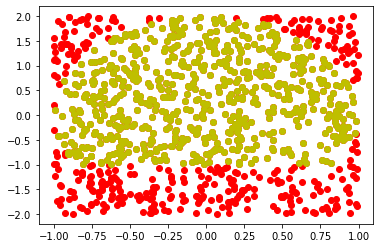

In [75]:
plot(px,py,"ro")
plot(pxi,pyi,"yo")

In [101]:
#Q5.a
basis=[lambda x: 1,sin,cos, lambda x: sin(2*x)]

In [102]:
xs=[0.1,0.2,0.3,0.4,0.5]
ys=[10,5,-4,-7,-1]

In [103]:
A=zeros([4,4])
for k in range(4):
    for j in range(4):
        A[k,j]=sum([basis[k](xs[i])*basis[j](xs[i]) for i in range(5)])

In [105]:
b=zeros(4)
for k in range(4):
    b[k]=sum([basis[k](xs[i])*ys[i] for i in range(5)])

In [107]:
#b
a=linalg.solve(A,b)
a

array([-1806.24968208,  2767.89685367,  1811.43734524, -1320.71537177])

In [108]:
#c 
def F(x):
    return sum([a[i]*basis[i](x) for i in range(4)])
F(0.25)

0.47842483646797973

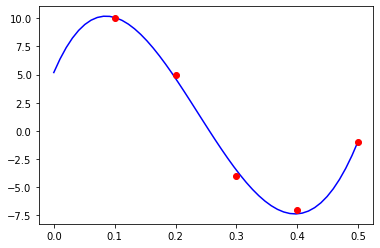

In [110]:
xd=linspace(0,0.5)
yd=[F(x) for x in xd]
plot(xd,yd,'b')
plot(xs,ys,"ro")

In [123]:
#6.a Euler Method
def g(x,y):
    return 1/y +y*sin(2*x)

In [124]:
h=xs[1]-xs[0]
n=200
xs=linspace(0,10,n)
ys=zeros(n)
ys[0]=1/4
for i in range(n-1):
    ys[i+1]=ys[i]+h*g(xs[i],ys[i])

3.908486089568521

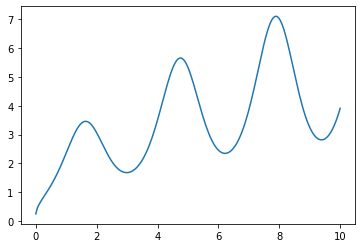

In [125]:
plot(xs,ys)
ys[-1]

In [122]:
#c Runge-Kutta method
h=xs[1]-xs[0]
n=200
xs=linspace(0,10,n)
ys=zeros(n)
ys[0]=1/4
for i in range(n-1):
    k0= h*g(xs[i],ys[i])
    k1= h*g(xs[i]+h,ys[i]+h)
    ys[i+1]=ys[i]+k0/2+k1/2
ys[-1]

3.972468373523113